In [69]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Lab | Imbalanced data

 ### 1. Load the dataset and explore the variables.

In [16]:
data = pd.read_csv('/Users/ziga/lab-imbalanced-data/files_for_lab/customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
data.shape

(7043, 21)

In [18]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [19]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.

### 3. Extract the target variable.

In [32]:
df = data[['Churn','tenure','SeniorCitizen','MonthlyCharges']]
df

,Churn,tenure,SeniorCitizen,MonthlyCharges
0,No,1,0,29.85
1,No,34,0,56.95
2,Yes,2,0,53.85
3,No,45,0,42.30
4,Yes,2,0,70.70
...,...,...,...,...
7038,No,24,0,84.80
7039,No,72,0,103.20
7040,No,11,0,29.60
7041,Yes,4,1,74.40


In [33]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [34]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [35]:
X.dtypes

tenure              int64
SeniorCitizen      object
MonthlyCharges    float64
dtype: object

### 4. Extract the independent variables and scale them.

In [36]:
X = pd.get_dummies(X)
X

,tenure,MonthlyCharges,SeniorCitizen_0,SeniorCitizen_1
0,1,29.85,1,0
1,34,56.95,1,0
2,2,53.85,1,0
3,45,42.30,1,0
4,2,70.70,1,0
...,...,...,...,...
7038,24,84.80,1,0
7039,72,103.20,1,0
7040,11,29.60,1,0
7041,4,74.40,0,1


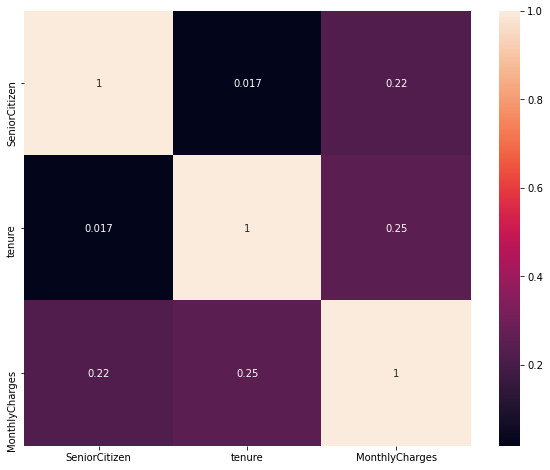

In [51]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

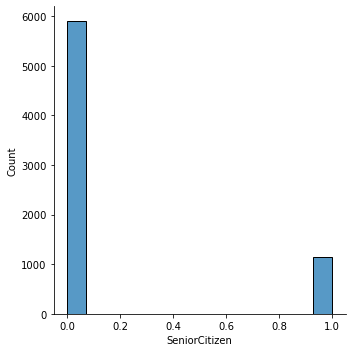

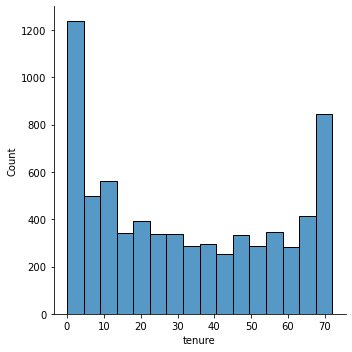

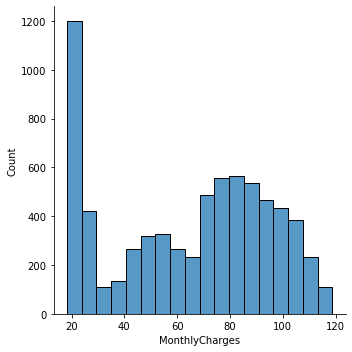

In [50]:
for col in data.select_dtypes(np.number):
    sns.displot(data[col])
    plt.show()

### 5. Build the logistic regression model.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
classification = LogisticRegression(random_state=42, max_iter=1000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### 6. Evaluate the model.

In [39]:
classification.score(X_test, y_test)

0.8062455642299503

In [44]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[956,  80],
       [193, 180]])

<AxesSubplot:>

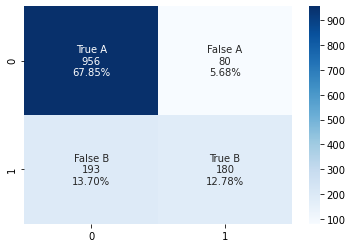

In [47]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A', 
               'False B', 'True B',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

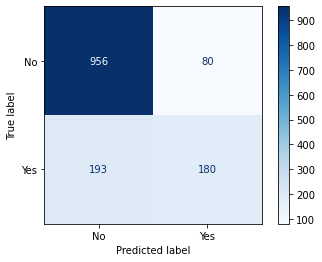

In [48]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classification, X_test, y_test, cmap='Blues')
plt.show()

In [73]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86       952
         Yes       0.66      0.52      0.58       364

    accuracy                           0.79      1316
   macro avg       0.74      0.71      0.72      1316
weighted avg       0.78      0.79      0.78      1316



### 7. Even a simple model will give us more than 70% accuracy. Why?

could it be connected to data imbalance ?

### 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X = df.drop('Churn', axis=1)
y = df['Churn']

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
classification = LogisticRegression(random_state=42, max_iter=1000)
classification.fit(X_train, y_train)
classification.score(X_test, y_test)

0.7458937198067633

In [80]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[761, 260],
       [266, 783]])

In [81]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.74      0.75      0.74      1021
         Yes       0.75      0.75      0.75      1049

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



### 9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [84]:
from imblearn.under_sampling import TomekLinks

X = df.drop('Churn', axis=1)
y = df['Churn']

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

No     4711
Yes    1869
Name: Churn, dtype: int64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)
classification = LogisticRegression(random_state=42, max_iter=1000)
classification.fit(X_train, y_train)
classification.score(X_test, y_test)

0.791033434650456

In [86]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[853,  99],
       [176, 188]])

In [87]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86       952
         Yes       0.66      0.52      0.58       364

    accuracy                           0.79      1316
   macro avg       0.74      0.71      0.72      1316
weighted avg       0.78      0.79      0.78      1316

